In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.fft import fft, fftfreq
from scipy.signal import spectrogram
from scipy.stats import entropy

import joblib


In [2]:
rf_model = joblib.load("../models/random_forest_rfi.pkl")


In [3]:
def extract_features(signal, fs=1000):
    mean_power = np.mean(signal**2)
    variance = np.var(signal)
    max_amp = np.max(np.abs(signal))
    
    yf = np.abs(fft(signal))
    xf = fftfreq(len(signal), 1/fs)
    
    peak_freq = np.abs(xf[np.argmax(yf)])
    spec_entropy = entropy(yf + 1e-10)
    
    return np.array([[mean_power, variance, peak_freq, spec_entropy, max_amp]])


In [4]:
fs = 1000
t = np.linspace(0, 1, fs)

test_signal = (
    np.sin(2 * np.pi * 50 * t) +
    0.6 * np.sin(2 * np.pi * 120 * t)
)


In [5]:
features = extract_features(test_signal)
prediction = rf_model.predict(features)[0]


In [6]:
label_map = {
    0: "No Interference (Clean)",
    1: "Narrowband Interference",
    2: "Broadband Interference",
    3: "Impulsive Interference"
}

prediction_result = label_map[prediction]
prediction_result


'Broadband Interference'

In [7]:
if prediction == 0:
    print("RFI DETECTION: NO")
else:
    print("RFI DETECTION: YES")


RFI DETECTION: YES


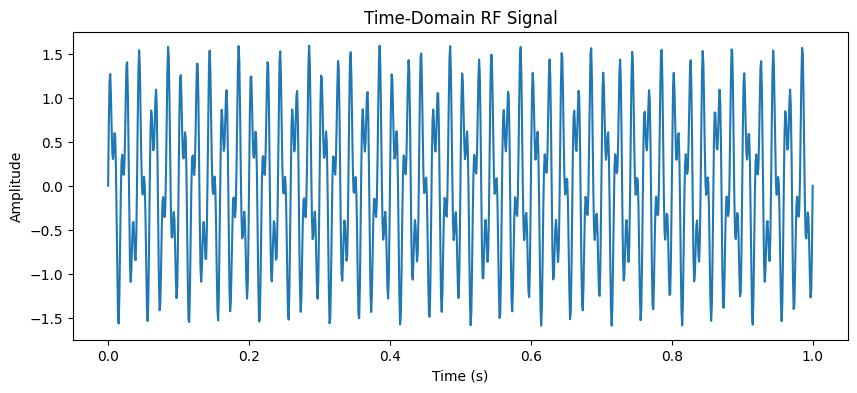

In [8]:
plt.figure(figsize=(10,4))
plt.plot(t, test_signal)
plt.title("Time-Domain RF Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()


In [9]:
plt.savefig("../results/time_domain_signal.png")


<Figure size 640x480 with 0 Axes>

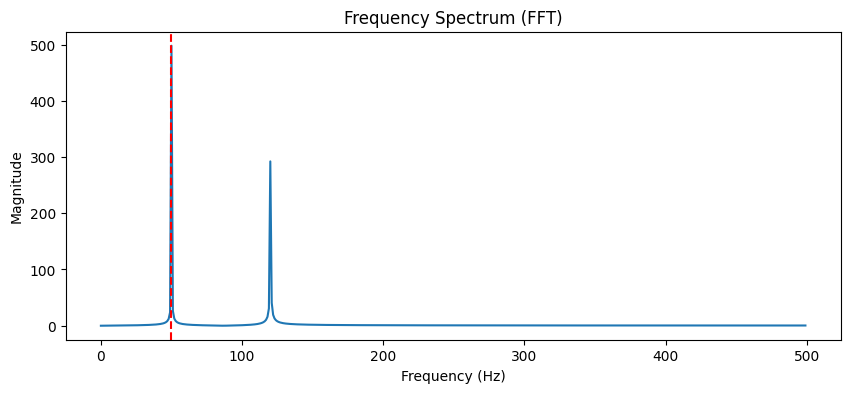

In [10]:
yf = np.abs(fft(test_signal))
xf = fftfreq(len(test_signal), 1/fs)

plt.figure(figsize=(10,4))
plt.plot(xf[:fs//2], yf[:fs//2])
plt.axvline(x=features[0][2], color="r", linestyle="--")
plt.title("Frequency Spectrum (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()


In [11]:
plt.savefig("../results/fft_interference.png")


<Figure size 640x480 with 0 Axes>

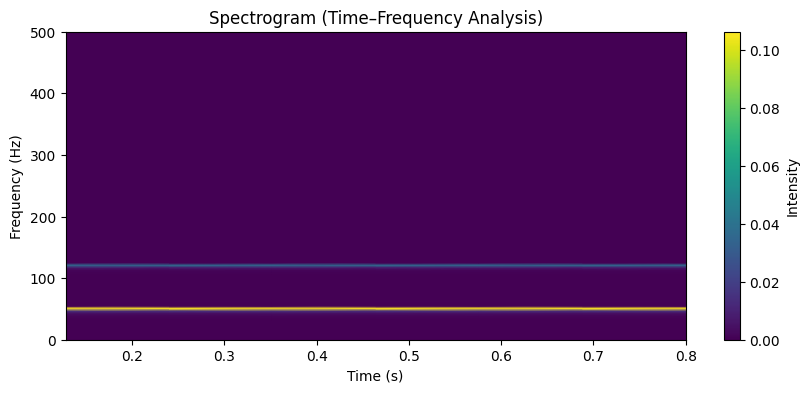

In [12]:
f, t_spec, Sxx = spectrogram(test_signal, fs)

plt.figure(figsize=(10,4))
plt.pcolormesh(t_spec, f, Sxx, shading="gouraud")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")
plt.title("Spectrogram (Time–Frequency Analysis)")
plt.colorbar(label="Intensity")
plt.show()


In [13]:
plt.savefig("../results/spectrogram.png")


<Figure size 640x480 with 0 Axes>

In [14]:
print("========== RFI DETECTION RESULT ==========")
print("Interference Present :", "YES" if prediction != 0 else "NO")
print("Interference Type    :", prediction_result)
print("Peak Frequency (Hz)  :", round(features[0][2], 2))


========== RFI DETECTION RESULT ==========
Interference Present : YES
Interference Type    : Broadband Interference
Peak Frequency (Hz)  : 50.0
